<a href="https://colab.research.google.com/github/d-klotz/ai-training/blob/main/linear-regression-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Pandas library to load the dataset.


In [2]:
import pandas as pd

dataset = pd.read_csv("data/housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Configurations
Let's make sure this notebook works fine with python 2 and 3. 
Matplotlit will be used for data visualization.

In [3]:
import numpy as np
np.random.seed(42)
import os

# used to plot the charts
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Knowing the dataset

In [4]:
# Displayes how many rows and columns are in the dataset
dataset.shape

(20640, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms has 207 missing values.

ocean_proximity is of type text, let's check how many categorical values it has

In [6]:
set(dataset['ocean_proximity'])
dataset['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Let's see some statistics about the numerical features

In [7]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's visualize the data to get a better understanding

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

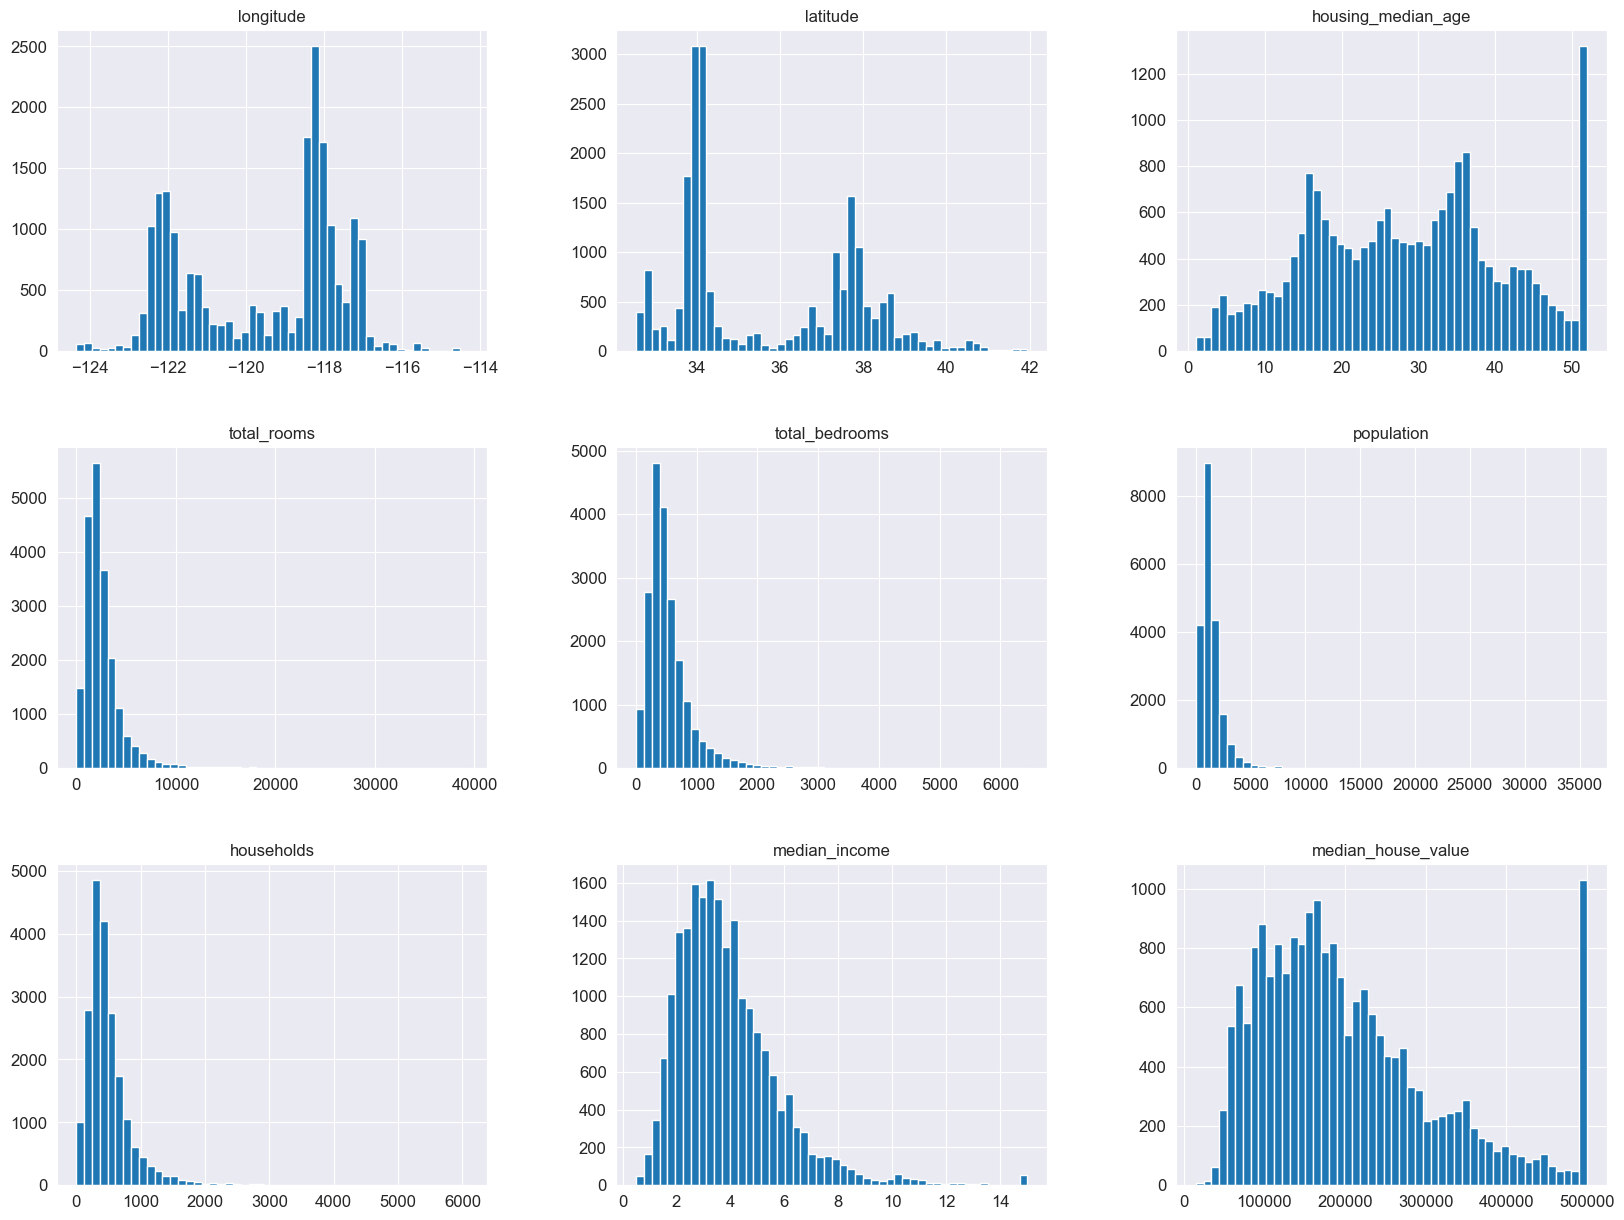

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

After checking the histograms, we notice that median income is capped at 15 and median house value is capped at 500,000. If we want to make predictions for houses above 500,000, we need to train our model with higher-priced data.

### Let's separate our databases into a training set and a test set.

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataset, test_size= 0.2, random_state=7)
print(len(df_train), "training", len(df_test), "testing")

16512 training 4128 testing


## Creating categories of median annual income
Let's suppose that we talked to a sales specialist and he said that median income is an important attribute to add to the predictive model. When we divide the dataset into training and testing sets, we need to make sure that the distribution of incomes in both sets is similar. We can achieve this by dividing the median income into categories.

<Axes: >

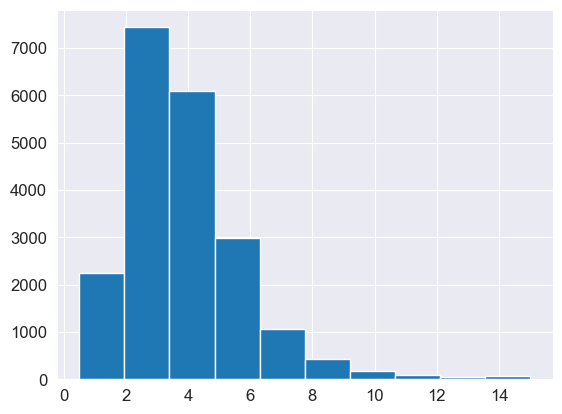

In [10]:
dataset['median_income'].hist()

Divide incomes into 5 categories by dividing the value of the column "median_income" by 1.5 and then rounding up to the nearest whole number. with np.ceil.

In [11]:
dataset['income_cat'] = np.ceil(dataset['median_income'] / 1.5)

Label those above 5 as 5 and those below 5 remains the same.

In [12]:
dataset['income_cat'].where(dataset['income_cat'] < 5, 5)

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

We can use the cut function from pandas to divide a set of intervaled data into bins.

In [13]:
dataset['income_cat'] = pd.cut(dataset['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
dataset['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

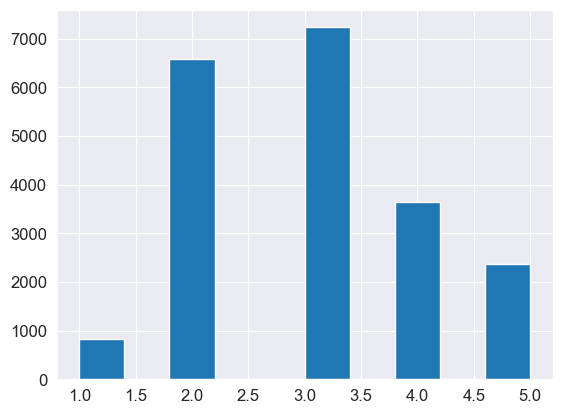

In [14]:
dataset['income_cat'].hist()

Now we can use stratified sampling to ensure that test and training sets have the same distribution of income categories. 

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset['income_cat']):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [16]:
#Let's check the distribution of income categories in the test set
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
#Let's check the distribution of income categories in the training set
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [18]:
dataset['income_cat'].value_counts() / len(dataset)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

After finishing stratified sampling, we can remove the income_cat column from the datasets because it's no longer needed, we only used it as an auxiliary variable for stratified sampling.'

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### Analysing geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

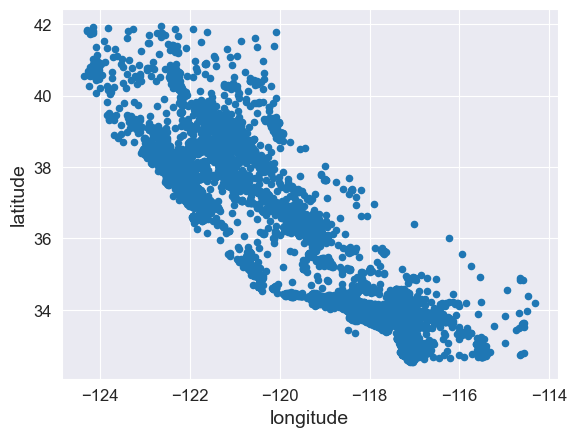

In [20]:
housing = strat_train_set.copy()

# The scatter plot will display almost a perfetc map of the California cities.
housing.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

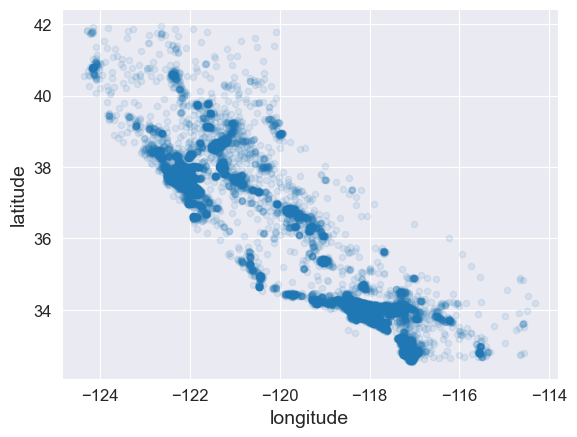

In [21]:
# This chart will display a density of the houses in the map.
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Now let's plot the housing prices on the map and compare it with the density of houses.

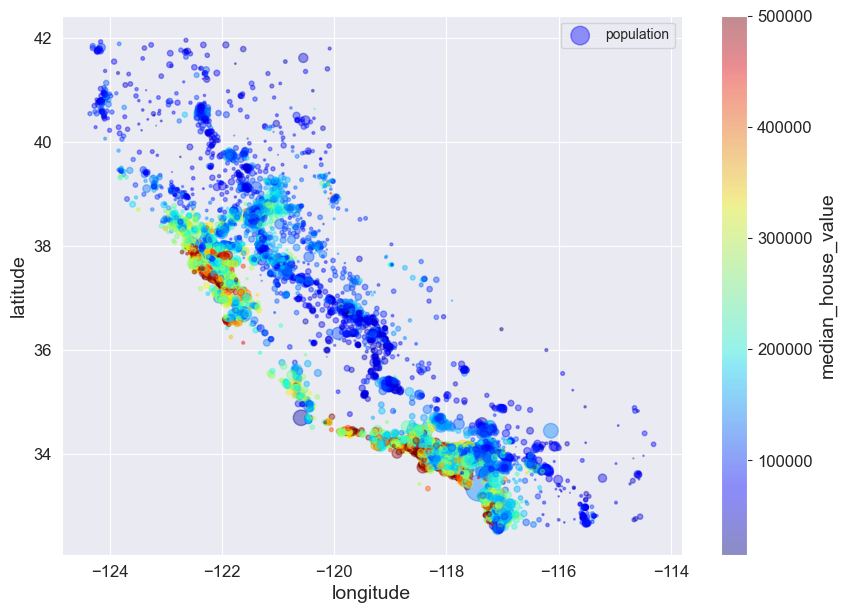

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()

### Correlations
Now let's look at the correlations between the attributes.

In [23]:
housing = housing.drop(columns="ocean_proximity")
corr_matrix = housing.corr()

In [24]:
# We can see that median house value is strongly correlated with median income
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

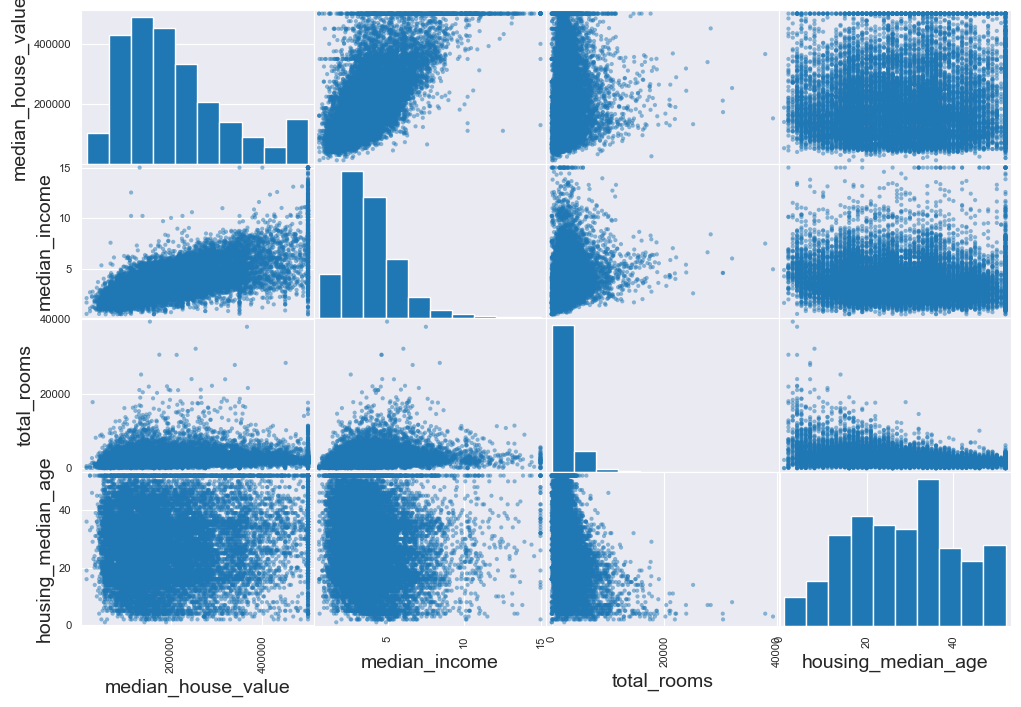

In [25]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

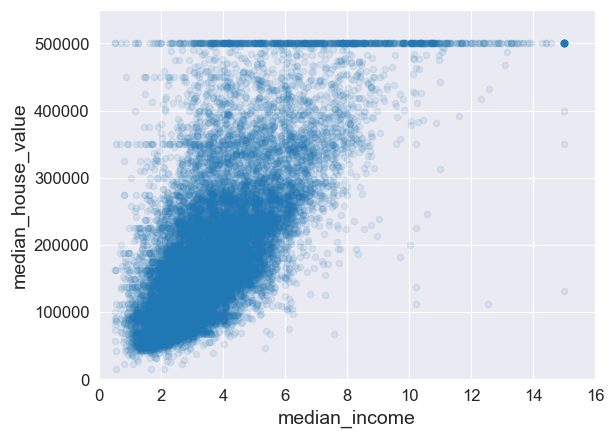

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1) # apagando a target para a base de treino (nosso x)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [29]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

It's possible that some values are null, how are we going to handle them?

In [30]:
# Option 1
# Replacing values with the median
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

/var/folders/zm/_xv1n66n12sc89g0vq7ch3680000gn/T/ipykernel_87027/612626912.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


### Or using Sklearn's built-in SimpleImputer to replace null values by the median.

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer (strategy="median")), #replace null values by median 
('std_scaler', StandardScaler()), # standardize the features
])

housing_num = housing.drop(columns="ocean_proximity")
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

**Column transformer** is a scikit learn feature that allows us to apply different transformations on different columns (numbers/categories).

In [33]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20 

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer ([
    ("num", num_pipeline, num_attribs), # transforming numerical attributes
    ("cat", OneHotEncoder(), cat_attribs), # transforming categorical attributes -> This takes each category and adds each value a separate column and then adds 0 and 1 in this column for each category.
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
housing_prepared.shape

(16512, 13)

In [56]:
column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income', 
                '1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

# Transforming the numpy array back to a pandas DataFrame
housing_df = pd.DataFrame(data=housing_prepared, columns=column_names)
housing_df

# Display de DataFrame outcome
# print(housing_df.shape)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


In [37]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0


In [38]:
print(housing_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
1H OCEAN              0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64


In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

### Let's test the model with some data.'

In [40]:
some_data = housing.iloc [:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform (some_data)
predictions = lin_reg.predict (housing_prepared)
print("Predictions:", lin_reg.predict (some_data_prepared) )

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]


### Compare with actual values from the labels.

In [41]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### Evaluate the model
MSE (Mean Square Error) is the mean squared of the differences between the predicted and actual values.
The closer the MSE, the better the model.


In [42]:
from sklearn.metrics import mean_squared_error
# Mean squared error squares the average of the absolute mean error. I'm evaluating if the errors are not too large, it penalizes values far from the mean much more.
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) # square root of the mean squared error
lin_rmse

np.float64(69050.56219504567)

### MAE (Mean Absolute Error) is the mean of the absolute differences between the predicted and actual values. The closer to zero, the better the model.

In [43]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

np.float64(49905.329442715316)

A margin of error of 69,050 dollars is not very acceptable in our model, given that the median_housing_values range between 120 thousand dollars and 265 thousand dollars. We can define here that this model is overfitting. Shall we try a more powerful model?

Using R2 the value needs to be close to 1

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(housing_labels, housing_predictions)
print ('p2', r2)

p2 0.6438078994746375


In [45]:
# Function to calculate the MAPE (Mean Absolute Percentage Error) The closer to 100% more inaccurate the model. 
def calculate_mape(labels, predictions):
    errors = np.abs (labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np. mean (relative_errors) * 100
    return mape

In [46]:
# Calc MAPE
mape_result = calculate_mape(housing_labels, housing_predictions)
# print result
print(f"O MAPE é: {mape_result: 2f}%")

O MAPE é:  28.648798%


## Let's try other models

In [47]:
from sklearn. tree import DecisionTreeRegressor
# Create a DecisionTreeRegressor model
model_dtr = DecisionTreeRegressor (max_depth=10)
model_dtr. fit(housing_prepared, housing_labels)

DecisionTreeRegressor(max_depth=10)

In [48]:
# let's try the complete preprocessing pipeline on some training instances
some_data = housing. iloc[ :5]
some_labels = housing_labels. iloc [:5]
some_data_prepared = full_pipeline.transform (some_data)
predictions = model_dtr.predict (some_data_prepared)
print ("Predictions:", model_dtr.predict (some_data_prepared) )

Predictions: [ 90980.88235294 324661.11111111  72856.96202532 168772.60273973
 226591.38505747]


In [49]:
# Actual data
print("Labels:", list (some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [50]:
### Checking the performance of the Decision Tree Model

In [51]:
# mean_squared_error
housing_predictions = model_dtr. predict (housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np. sqrt(lin_mse)
lin_rmse

np.float64(47873.314559945495)

In [52]:
# mean_absolute_error
lin_mae = lin_mae
mean_absolute_error(housing_labels, housing_predictions)

np.float64(32067.265630356796)

In [53]:
r2 = r2_score(housing_labels, housing_predictions)
print('r2', r2)

r2 0.8287869591640339


In [54]:
# Calc MAPE
mape_result = calculate_mape(housing_labels, housing_predictions)
# print
print(f"O MAPE é: {mape_result: 2f}%")

O MAPE é:  17.941159%
